<a href="https://colab.research.google.com/github/Ashika-Ashok/Disease-prediction-GNN/blob/main/GNN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load your train & test data
train_df = pd.read_csv("training_data.csv")
test_df = pd.read_csv("test_data.csv")

# Separate features (X) and labels (y)
X_train = train_df.drop(columns=["prognosis"])   # assuming 'label' column exists
y_train = train_df["prognosis"]

X_test = test_df.drop(columns=["prognosis"])
y_test = test_df["prognosis"]

# List of models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(classification_report(y_test, y_pred))

    results.append([name, acc, prec, rec, f1])

# Store results in a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nFinal Comparison:")
print(results_df)


===== Logistic Regression =====
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00     


 Running with 0% Feature Noise 
Logistic Regression | Acc: 1.0000 | Prec: 1.0000 | Recall: 1.0000 | F1: 1.0000
Random Forest | Acc: 0.9762 | Prec: 0.9881 | Recall: 0.9762 | F1: 0.9762
Decision Tree | Acc: 0.9762 | Prec: 0.9881 | Recall: 0.9762 | F1: 0.9762
KNN | Acc: 1.0000 | Prec: 1.0000 | Recall: 1.0000 | F1: 1.0000
SVM | Acc: 1.0000 | Prec: 1.0000 | Recall: 1.0000 | F1: 1.0000
MLP (Neural Net) | Acc: 1.0000 | Prec: 1.0000 | Recall: 1.0000 | F1: 1.0000

 Running with 10% Feature Noise 
Logistic Regression | Acc: 0.9048 | Prec: 0.8810 | Recall: 0.9048 | F1: 0.8810
Random Forest | Acc: 0.9048 | Prec: 0.8810 | Recall: 0.9048 | F1: 0.8810
Decision Tree | Acc: 0.6905 | Prec: 0.5913 | Recall: 0.6905 | F1: 0.6151
KNN | Acc: 0.8333 | Prec: 0.7698 | Recall: 0.8333 | F1: 0.7897
SVM | Acc: 0.9048 | Prec: 0.8810 | Recall: 0.9048 | F1: 0.8810
MLP (Neural Net) | Acc: 0.9048 | Prec: 0.8810 | Recall: 0.9048 | F1: 0.8810

 Running with 20% Feature Noise 
Logistic Regression | Acc: 0.8571 | Prec: 0.8

<Figure size 1200x600 with 0 Axes>

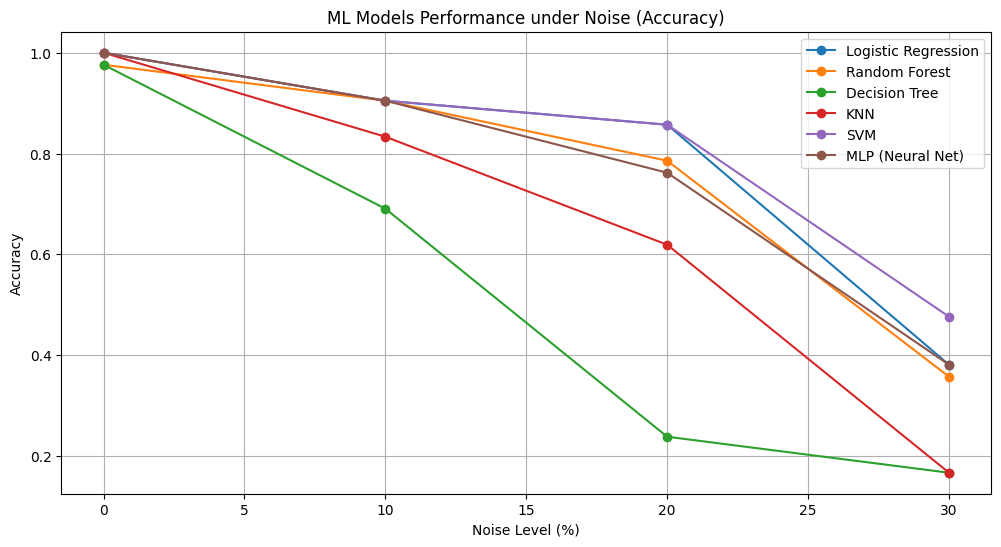

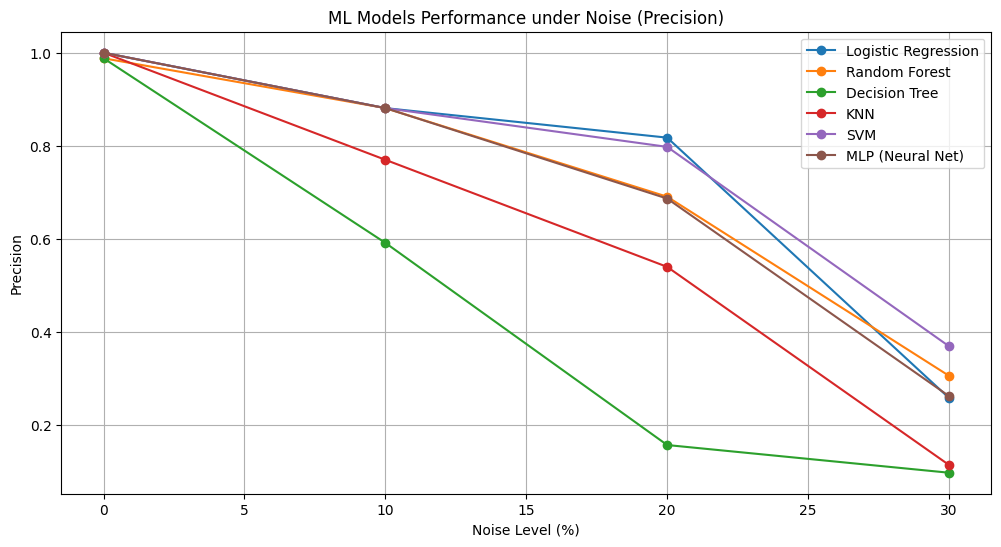

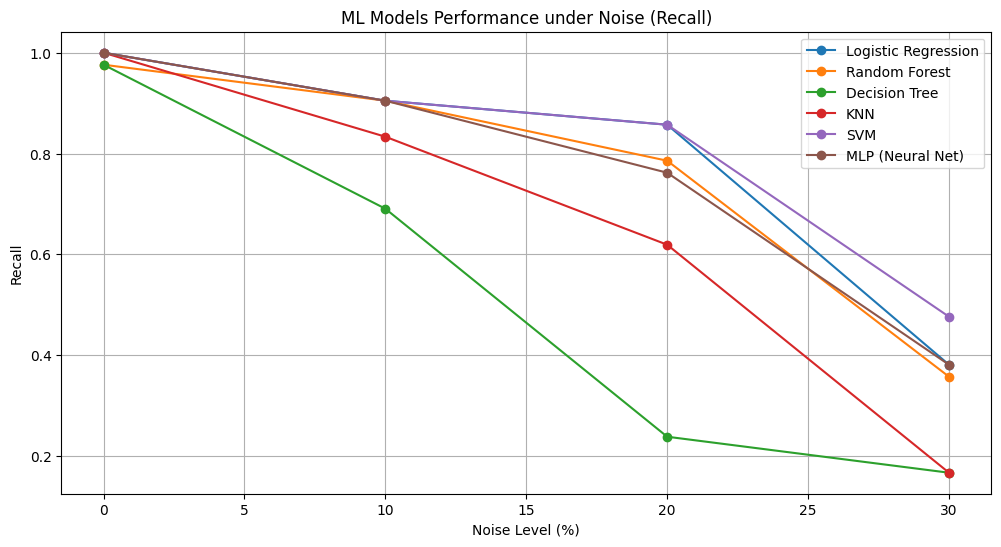

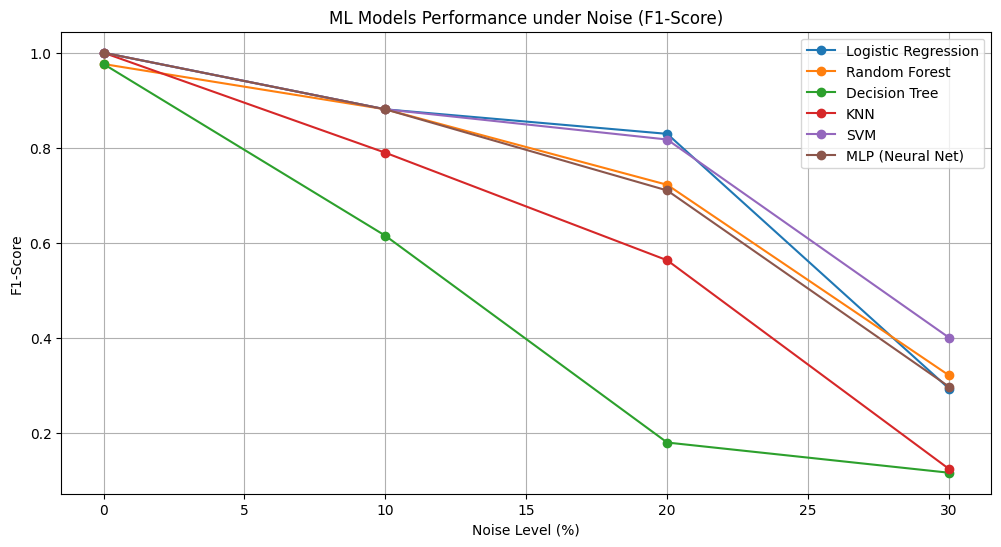

In [ ]:
#finding metrics with noise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --------------------------
# Load Data
# --------------------------
train_df = pd.read_csv("training_data.csv")
test_df = pd.read_csv("test_data.csv")

label_col = "prognosis"  # adjust if your target column is named differently

X_train = train_df.drop(columns=[label_col])
y_train = train_df[label_col]

X_test = test_df.drop(columns=[label_col])
y_test = test_df[label_col]

# --------------------------
# Noise Injection Function
# --------------------------
def inject_feature_noise(X, noise_level=0.1, random_state=42):
    np.random.seed(random_state)
    X_noisy = X.copy()
    n_samples, n_features = X.shape
    n_noisy = int(noise_level * n_samples * n_features)

    # pick random entries to flip (0 -> 1, 1 -> 0)
    noisy_indices = (
        np.random.randint(0, n_samples, n_noisy),
        np.random.randint(0, n_features, n_noisy),
    )
    X_noisy.values[noisy_indices] = 1 - X_noisy.values[noisy_indices]
    return X_noisy

# --------------------------
# Define Models
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
}

# --------------------------
# Run Experiments
# --------------------------
noise_levels = [0.0, 0.1, 0.2, 0.3]
results = []

for nl in noise_levels:
    print(f"\n==============================")
    print(f" Running with {int(nl*100)}% Feature Noise ")
    print("==============================")

    X_train_noisy = inject_feature_noise(X_train, noise_level=nl)
    X_test_noisy  = inject_feature_noise(X_test, noise_level=nl)

    for name, model in models.items():
        model.fit(X_train_noisy, y_train)
        y_pred = model.predict(X_test_noisy)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

        print(f"{name} | Acc: {acc:.4f} | Prec: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

        results.append([nl, name, acc, prec, rec, f1])

# --------------------------
# Save Results
# --------------------------
results_df = pd.DataFrame(results, columns=["Noise", "Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nFinal Results Table:")
print(results_df)

# --------------------------
# Visualization
# --------------------------
plt.figure(figsize=(12,6))
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    plt.figure(figsize=(12,6))
    for model_name in results_df["Model"].unique():
        subset = results_df[results_df["Model"] == model_name]
        plt.plot(subset["Noise"]*100, subset[metric], marker="o", label=model_name)
    plt.xlabel("Noise Level (%)")
    plt.ylabel(metric)
    plt.title(f"ML Models Performance under Noise ({metric})")
    plt.legend()
    plt.grid(True)
    plt.show()


Data Loaded ✅
Shape: (4920, 132)
Columns (symptoms): ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue'] ...
Injected 20% noise: flipped 129888 symptom values
Bipartite Graph: 5052 nodes, 131442 edges


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


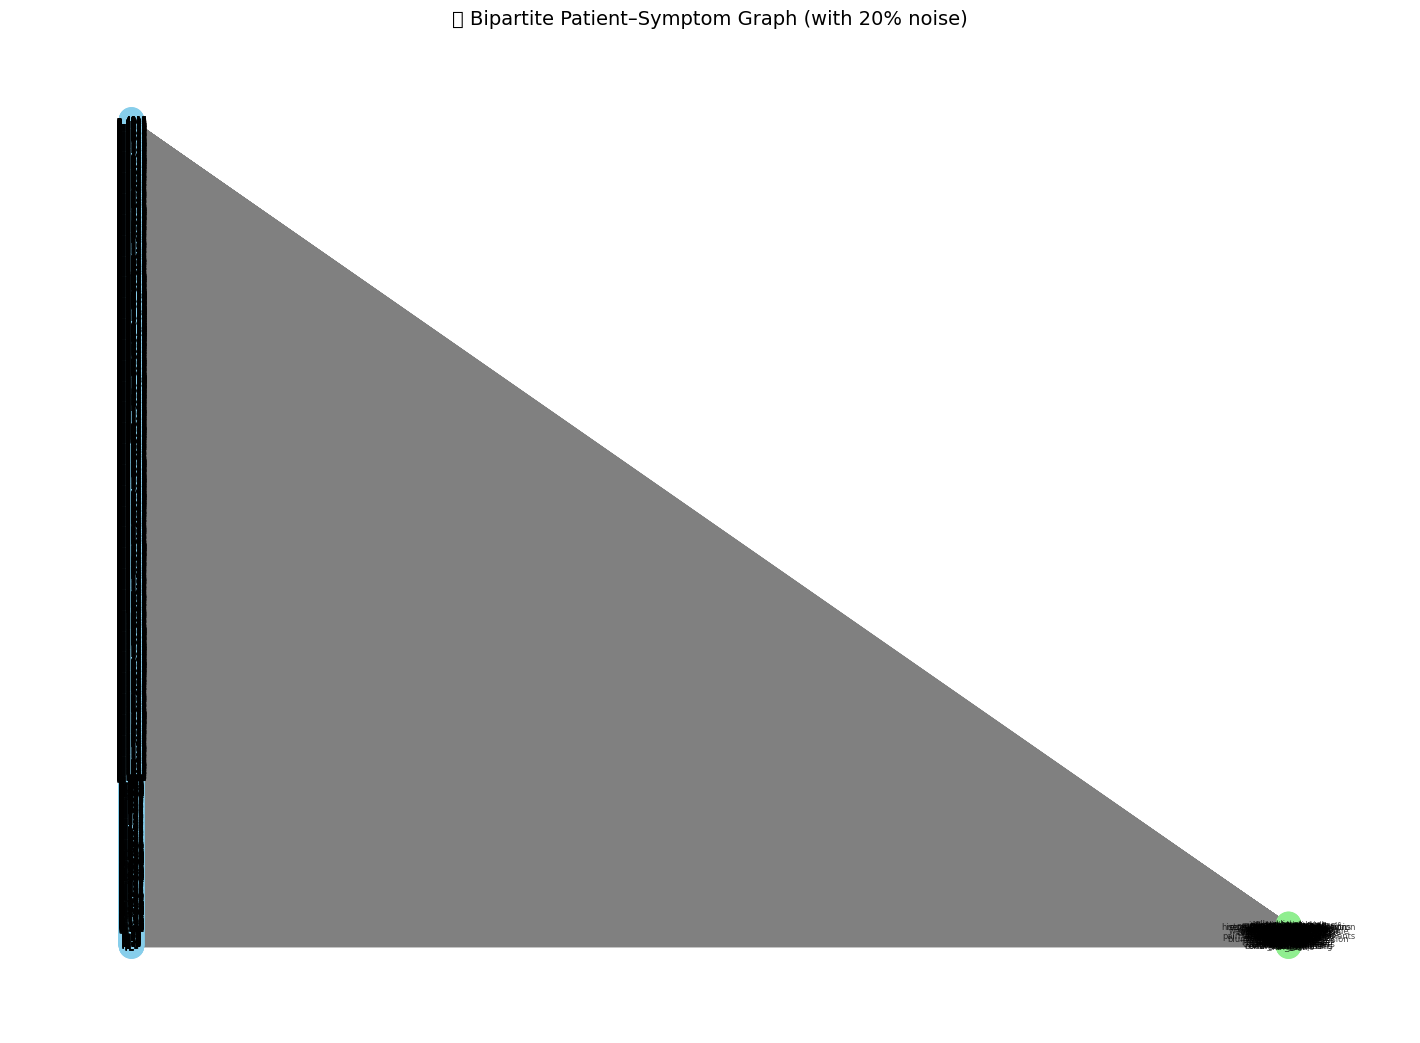

Projected Patient–Patient Graph: 4920 nodes, 12055043 edges


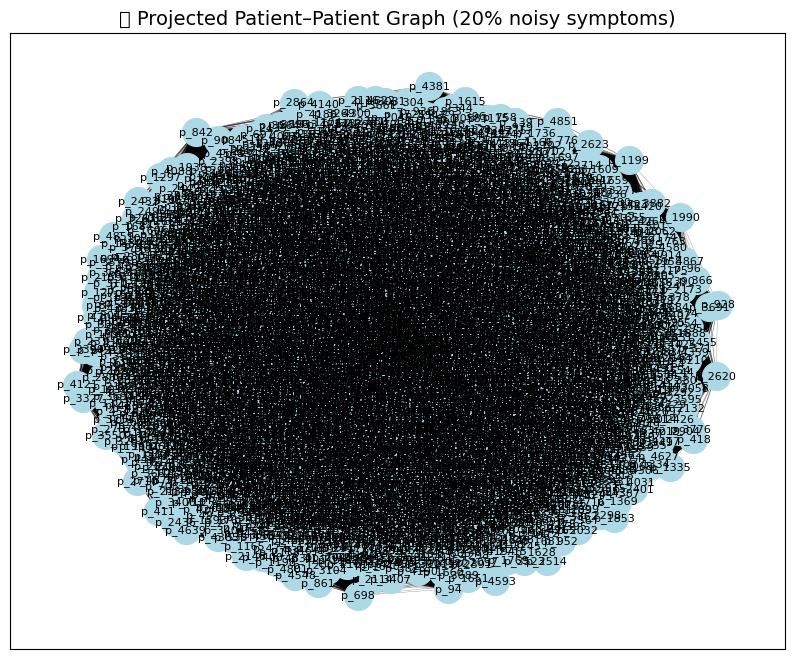

Sample Patient–Patient connections with weights:
p_0 -- p_3079 (shared noisy symptoms: 7)
p_0 -- p_2721 (shared noisy symptoms: 9)
p_0 -- p_990 (shared noisy symptoms: 2)
p_0 -- p_3481 (shared noisy symptoms: 4)
p_0 -- p_3031 (shared noisy symptoms: 3)
p_0 -- p_1321 (shared noisy symptoms: 3)
p_0 -- p_4495 (shared noisy symptoms: 4)
p_0 -- p_2481 (shared noisy symptoms: 4)
p_0 -- p_4148 (shared noisy symptoms: 7)
p_0 -- p_4131 (shared noisy symptoms: 6)


In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# ===============================
# 2. Load Train Data
# ===============================
train_df = pd.read_csv("training_data.csv")

# Separate features (symptoms) and labels (disease prognosis)
X = train_df.drop(columns=["prognosis"]).copy()
y = train_df["prognosis"]

print("Data Loaded ✅")
print("Shape:", X.shape)
print("Columns (symptoms):", list(X.columns)[:10], "...")  # show first 10 symptoms

# ===============================
# 3. Inject Noise (20% flip)
# ===============================
np.random.seed(42)  # reproducibility
X_noisy = X.copy()

num_entries = X_noisy.size
num_flips = int(0.2 * num_entries)  # 20% noise

# Randomly pick (row, col) positions to flip
rows = np.random.randint(0, X_noisy.shape[0], num_flips)
cols = np.random.randint(0, X_noisy.shape[1], num_flips)

for r, c in zip(rows, cols):
    X_noisy.iat[r, c] = 1 - X_noisy.iat[r, c]  # flip 0→1 or 1→0

print(f"Injected 20% noise: flipped {num_flips} symptom values")

# ===============================
# 4. Build Bipartite Graph
# ===============================
B = nx.Graph()

patients = [f"p_{i}" for i in range(len(X_noisy))]   # left side (patients)
symptoms = list(X_noisy.columns)                     # right side (symptoms)

# Add nodes with bipartite sets
B.add_nodes_from(patients, bipartite=0)  # patient nodes
B.add_nodes_from(symptoms, bipartite=1)  # symptom nodes

# Add edges: patient -> symptom if symptom=1
for i, row in X_noisy.iterrows():
    for symptom in symptoms:
        if row[symptom] == 1:  # symptom present
            B.add_edge(f"p_{i}", symptom)

print(f"Bipartite Graph: {B.number_of_nodes()} nodes, {B.number_of_edges()} edges")

# ===============================
# 5. Visualize Bipartite Graph
# ===============================
plt.figure(figsize=(14, 10))

pos = {}
pos.update((node, (0, i)) for i, node in enumerate(patients))  # left
pos.update((node, (1, i)) for i, node in enumerate(symptoms))  # right

nx.draw(
    B, pos,
    with_labels=True,
    node_size=300,
    node_color=["skyblue" if n in patients else "lightgreen" for n in B.nodes()],
    font_size=6,
    edge_color="gray",
    alpha=0.7
)
plt.title("🌿 Bipartite Patient–Symptom Graph (with 20% noise)", fontsize=14)
plt.show()


# 6. Project to Patient–Patient Graph
# ===============================
P = bipartite.weighted_projected_graph(B, patients)
print(f"Projected Patient–Patient Graph: {P.number_of_nodes()} nodes, {P.number_of_edges()} edges")

# ===============================
# 7. Visualize Patient–Patient Graph
# ===============================
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(P, seed=42)
nx.draw_networkx_nodes(P, pos, node_size=400, node_color="lightblue")
nx.draw_networkx_edges(P, pos, width=[d["weight"]*0.2 for _,_,d in P.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(P, pos, font_size=8)

plt.title("🌿 Projected Patient–Patient Graph (20% noisy symptoms)", fontsize=14)
plt.show()

# ===============================
# 8. Inspect Example Edges
# ===============================
print("Sample Patient–Patient connections with weights:")
for u, v, d in list(P.edges(data=True))[:10]:
    print(f"{u} -- {v} (shared noisy symptoms: {d['weight']})")


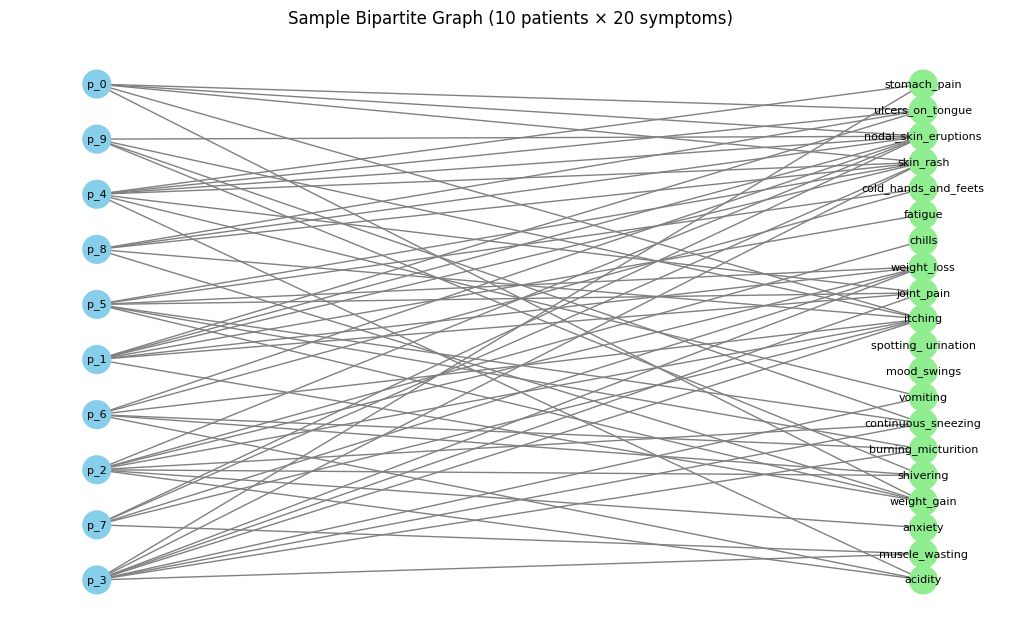

In [ ]:
sub_patients = patients[:10]
sub_symptoms = symptoms[:20]
B_sub = B.subgraph(sub_patients + sub_symptoms)

plt.figure(figsize=(10,6))
pos = nx.bipartite_layout(B_sub, sub_patients)
nx.draw(B_sub, pos,
        with_labels=True,
        node_size=400,
        node_color=["skyblue" if n in sub_patients else "lightgreen" for n in B_sub.nodes()],
        font_size=8,
        edge_color="gray")
plt.title("Sample Bipartite Graph (10 patients × 20 symptoms)")
plt.show()

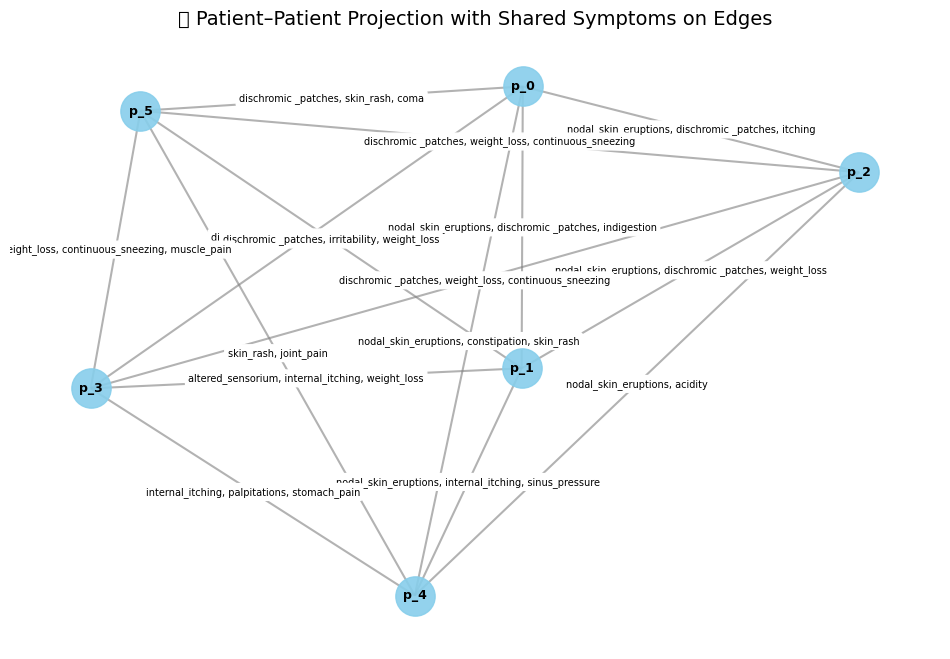

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Subgraph with fewer patients for clarity (adjust sample size as needed)
sub_patients = list(P.nodes())[:6]  # pick first 6 patients
subgraph = P.subgraph(sub_patients)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, seed=42, k=1.2)  # more spacing

# Draw nodes
nx.draw_networkx_nodes(
    subgraph, pos,
    node_size=800,
    node_color="skyblue",
    alpha=0.9
)

# Draw edges
nx.draw_networkx_edges(
    subgraph, pos,
    width=1.5,
    edge_color="gray",
    alpha=0.6
)

# Draw patient labels
nx.draw_networkx_labels(subgraph, pos, font_size=9, font_weight="bold")

# ---- NEW: Add symptom labels on edges ----
edge_labels = {}
for u, v, d in subgraph.edges(data=True):
    shared_symptoms = set(B.neighbors(u)).intersection(set(B.neighbors(v)))
    edge_labels[(u, v)] = ", ".join(list(shared_symptoms)[:3])  # limit to 3 for readability

# Place edge labels slightly above edges
nx.draw_networkx_edge_labels(
    subgraph, pos,
    edge_labels=edge_labels,
    font_size=7,
    rotate=False,
    label_pos=0.5  # middle of edge
)

plt.title("🌿 Patient–Patient Projection with Shared Symptoms on Edges", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
# Pick an example edge from the subgraph
example_edge = list(subgraph.edges(data=True))[0]
u, v, d = example_edge

# Find shared symptoms directly from B
shared_symptoms = set(B.neighbors(u)).intersection(set(B.neighbors(v)))

print(f"Patients {u} and {v} are connected because they share {d['weight']} symptoms:")
print("Shared Symptoms:", shared_symptoms)


Patients p_4 and p_0 are connected because they share 5 symptoms:
Shared Symptoms: {'nodal_skin_eruptions', 'skin_rash', 'acute_liver_failure', 'constipation', 'ulcers_on_tongue'}


In [ ]:
# ===============================
# 0. Imports
# ===============================
!pip install torch-geometric --quiet

import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, SAGEConv, GATConv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
print("imported libraries")
# ===============================
# 1. Load Data
# ===============================
train_df = pd.read_csv("training_data.csv")
test_df  = pd.read_csv("test_data.csv")

label_col = "prognosis"
X_train = train_df.drop(columns=[label_col])
y_train = train_df[label_col]
X_test  = test_df.drop(columns=[label_col])
y_test  = test_df[label_col]

# ===============================
print("2. Dimensionality Reduction")
# ===============================
svd = TruncatedSVD(n_components=min(32, X_train.shape[1]), random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced  = svd.transform(X_test)

# ===============================
print("3. Build Bipartite Graph (train + test)")
# ===============================
patients_train = [f"p_{i}" for i in range(len(X_train_reduced))]
patients_test  = [f"q_{i}" for i in range(len(X_test_reduced))]
all_patients   = patients_train + patients_test
symptoms = [f"s_{i}" for i in range(X_train_reduced.shape[1])]

B = nx.Graph()
B.add_nodes_from(all_patients, bipartite=0)
B.add_nodes_from(symptoms, bipartite=1)

# Connect train nodes
for i, row in enumerate(X_train_reduced):
    present_features = np.where(row > 0)[0]
    B.add_edges_from([(f"p_{i}", f"s_{f}") for f in present_features])

# Connect test nodes
for i, row in enumerate(X_test_reduced):
    present_features = np.where(row > 0)[0]
    B.add_edges_from([(f"q_{i}", f"s_{f}") for f in present_features])

# Project to patient–patient graph (all nodes)
P = bipartite.weighted_projected_graph(B, all_patients)
print(f"Projected Graph: {P.number_of_nodes()} nodes, {P.number_of_edges()} edges")

# ===============================
# 4. Sparsify Graph (Top-k neighbors)
# ===============================
k = 5
edges_to_keep = []
for node in P.nodes():
    neighbors = P[node]
    if len(neighbors) > 0:
        sorted_neighbors = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)[:k]
        edges_to_keep.extend([(node, n) for n, attr in sorted_neighbors])

G_sparse = nx.Graph()
G_sparse.add_nodes_from(P.nodes())
for u, v in edges_to_keep:
    G_sparse.add_edge(u, v, weight=P[u][v]['weight'])

# ===============================
# 5. Node mapping and edge_index
# ===============================
node_mapping = {node: i for i, node in enumerate(G_sparse.nodes())}
num_nodes = len(G_sparse.nodes())

edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in G_sparse.edges()],
                          dtype=torch.long).t().contiguous()
edge_weight = torch.tensor([G_sparse.edges[u, v]["weight"] for u, v in G_sparse.edges()],
                           dtype=torch.float)

# ===============================
# 6. Node features
# ===============================
data_x = torch.stack(
    [torch.tensor(X_train_reduced[int(node.split('_')[1])], dtype=torch.float)
     if node.startswith('p_') else torch.tensor(X_test_reduced[int(node.split('_')[1])], dtype=torch.float)
     for node in G_sparse.nodes()]
)

# Inject 20% feature noise
def inject_feature_noise_tensor(x, noise_level=0.2, seed=42):
    torch.manual_seed(seed)
    x_noisy = x.clone()
    n_nodes, n_feats = x_noisy.shape
    n_noisy = int(noise_level * n_nodes * n_feats)
    idx = torch.randint(0, n_nodes * n_feats, (n_noisy,))
    x_noisy.view(-1)[idx] = 1 - x_noisy.view(-1)[idx]
    return x_noisy

data_x = inject_feature_noise_tensor(data_x, noise_level=0.2)

# ===============================
# 7. Labels & Masks
# ===============================
le = LabelEncoder()
y_all = np.concatenate([y_train.values, y_test.values])
y_all_enc = le.fit_transform(y_all)
data_y = torch.tensor(y_all_enc, dtype=torch.long)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask  = torch.zeros(num_nodes, dtype=torch.bool)
for node in patients_train:
    train_mask[node_mapping[node]] = True
for node in patients_test:
    test_mask[node_mapping[node]]  = True

# ===============================
# 8. Graph Model (GCN / GraphSAGE / GAT)
# ===============================
class GraphModel(torch.nn.Module):
    def __init__(self, model_type, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.model_type = model_type
        if model_type == "GCN":
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif model_type == "GraphSAGE":
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        elif model_type == "GAT":
            self.conv1 = GATConv(in_channels, hidden_channels, heads=2, concat=True)
            self.conv2 = GATConv(hidden_channels*2, out_channels, heads=1)
        else:
            raise ValueError("Unknown model type")

    def forward(self, x, edge_index, edge_weight=None):
        if self.model_type == "GCN":
            x = F.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv2(x, edge_index, edge_weight=edge_weight)
        else:  # GraphSAGE or GAT
            x = F.relu(self.conv1(x, edge_index))
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv2(x, edge_index)
        return x

# ===============================
# 9. Train & Evaluate
# ===============================
def train_evaluate(model, data_x, data_y, edge_index, edge_weight, train_mask, test_mask,
                   epochs=200, lr=0.01, weight_decay=5e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data_x, edge_index, edge_weight)
        loss = criterion(out[train_mask], data_y[train_mask])
        loss.backward()
        optimizer.step()
        if (epoch+1) % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        out = model(data_x, edge_index, edge_weight)
        pred = out[test_mask].argmax(dim=1).cpu().numpy()
        true = data_y[test_mask].cpu().numpy()

    acc  = accuracy_score(true, pred)
    prec = precision_score(true, pred, average="weighted", zero_division=0)
    rec  = recall_score(true, pred, average="weighted", zero_division=0)
    f1   = f1_score(true, pred, average="weighted", zero_division=0)

    return acc, prec, rec, f1

# ===============================
# 10. Run all models
# ===============================
feat_dim = data_x.shape[1]
num_classes = len(torch.unique(data_y))
hidden_dim = 64

for model_type in ["GCN", "GraphSAGE", "GAT"]:
    print(f"\n🔹 Training {model_type} on full sparse graph...")
    model = GraphModel(model_type, feat_dim, hidden_dim, num_classes)
    acc, prec, rec, f1 = train_evaluate(model, data_x, data_y, edge_index, edge_weight, train_mask, test_mask)
    print(f"{model_type} -> Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
imported libraries
2. Dimensionality Reduction
3. Build Bipartite Graph (train + test)
Projected Graph: 4962 nodes, 12308241 edges

🔹 Training GCN on full sparse graph...
Epoch 20/200 - Loss: 0.4956
Epoch 40/200 - Loss: 0.2395
Epoch 60/200 - Loss: 0.1792
Epoch 80/200 - Loss: 0.1522
Epoch 100/200 - Loss: 0.1219
Epoch 120/200 - Loss: 0.1134
Epoch 140/200 - Loss: 0.1064
Epoch 160/200 - Loss: 0.1042
Epoch 180/200 - Loss: 0.0959
Epoch 200/200 - Loss: 0.0994
GCN -> Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000

🔹 Training GraphSAGE on full sparse graph...
Epoch 20/200 - Loss: 0.5142
Epoch 40/200 - Loss: 0.1782
Epoch 60/200 - Loss: 0.1216
Epoch 80/200 - Loss: 0.1050
Epoch 100/200 - Loss: 0.0936
Epoch 120/200 - Loss: 0.0887
Epoch 140/200 - Loss: 0.0855
Epoch 160/200 - Loss: 0.0794
Epoch 180/200 - Loss: 0.0721
Epoch 200/200 - Loss: 0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
imported libraries
2. Dimensionality Reduction
3. Build Bipartite Graph (train + test)
Projected Graph: 4962 nodes, 12308241 edges

🔹 Training GCN with 10% noise...
Epoch 50/200 - Loss: 0.1433
Epoch 100/200 - Loss: 0.0982
Epoch 150/200 - Loss: 0.0980
Epoch 200/200 - Loss: 0.0781

🔹 Training GraphSAGE with 10% noise...
Epoch 50/200 - Loss: 0.0787
Epoch 100/200 - Loss: 0.0608
Epoch 150/200 - Loss: 0.0545
Epoch 200/200 - Loss: 0.0504

🔹 Training GAT with 10% noise...
Epoch 50/200 - Loss: 0.0857
Epoch 100/200 - Loss: 0.0546
Epoch 150/200 - Loss: 0.0493
Epoch 200/200 - Loss: 0.0419

🔹 Training GCN with 20% noise...
Epoch 50/200 - Loss: 0.1849
Epoch 100/200 - Loss: 0.1225
Epoch 150/200 - Loss: 0.1029
Epoch 200/200 - Loss: 0.0974

🔹 Training GraphSAGE with 20% noise...
Epoch 50/200 - Loss: 0.1509
Epoch 100/200 - Loss: 0.0919
Epoch 150/200

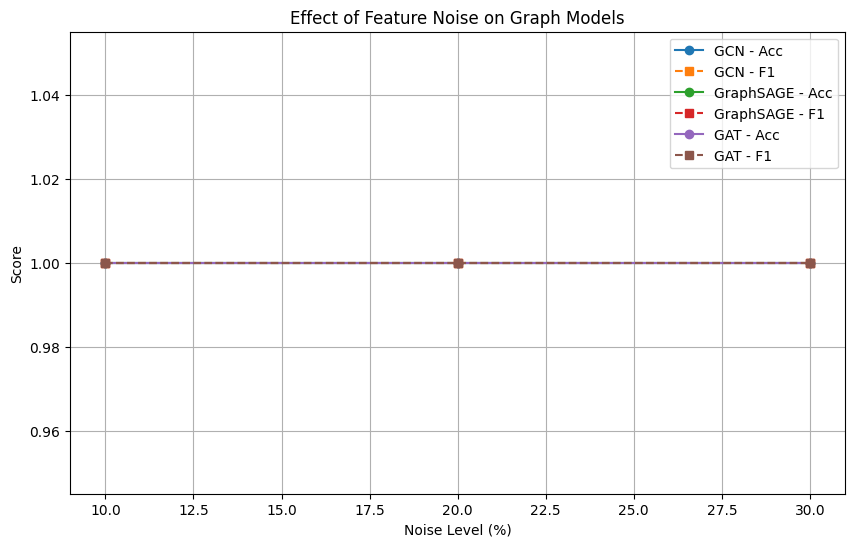

In [ ]:
# ===============================
# 0. Imports
# ===============================
!pip install torch-geometric --quiet

import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, SAGEConv, GATConv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

print("imported libraries")

# ===============================
# 1. Load Data
# ===============================
train_df = pd.read_csv("training_data.csv")
test_df  = pd.read_csv("test_data.csv")

label_col = "prognosis"
X_train = train_df.drop(columns=[label_col])
y_train = train_df[label_col]
X_test  = test_df.drop(columns=[label_col])
y_test  = test_df[label_col]

# ===============================
print("2. Dimensionality Reduction")
# ===============================
svd = TruncatedSVD(n_components=min(32, X_train.shape[1]), random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced  = svd.transform(X_test)

# ===============================
print("3. Build Bipartite Graph (train + test)")
# ===============================
patients_train = [f"p_{i}" for i in range(len(X_train_reduced))]
patients_test  = [f"q_{i}" for i in range(len(X_test_reduced))]
all_patients   = patients_train + patients_test
symptoms = [f"s_{i}" for i in range(X_train_reduced.shape[1])]

B = nx.Graph()
B.add_nodes_from(all_patients, bipartite=0)
B.add_nodes_from(symptoms, bipartite=1)

# Connect train nodes
for i, row in enumerate(X_train_reduced):
    present_features = np.where(row > 0)[0]
    B.add_edges_from([(f"p_{i}", f"s_{f}") for f in present_features])

# Connect test nodes
for i, row in enumerate(X_test_reduced):
    present_features = np.where(row > 0)[0]
    B.add_edges_from([(f"q_{i}", f"s_{f}") for f in present_features])

# Project to patient–patient graph (all nodes)
P = bipartite.weighted_projected_graph(B, all_patients)
print(f"Projected Graph: {P.number_of_nodes()} nodes, {P.number_of_edges()} edges")

# ===============================
# 4. Sparsify Graph (Top-k neighbors)
# ===============================
k = 5
edges_to_keep = []
for node in P.nodes():
    neighbors = P[node]
    if len(neighbors) > 0:
        sorted_neighbors = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)[:k]
        edges_to_keep.extend([(node, n) for n, attr in sorted_neighbors])

G_sparse = nx.Graph()
G_sparse.add_nodes_from(P.nodes())
for u, v in edges_to_keep:
    G_sparse.add_edge(u, v, weight=P[u][v]['weight'])

# ===============================
# 5. Node mapping and edge_index
# ===============================
node_mapping = {node: i for i, node in enumerate(G_sparse.nodes())}
num_nodes = len(G_sparse.nodes())

edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in G_sparse.edges()],
                          dtype=torch.long).t().contiguous()
edge_weight = torch.tensor([G_sparse.edges[u, v]["weight"] for u, v in G_sparse.edges()],
                           dtype=torch.float)

# ===============================
# 6. Node features
# ===============================
data_x = torch.stack(
    [torch.tensor(X_train_reduced[int(node.split('_')[1])], dtype=torch.float)
     if node.startswith('p_') else torch.tensor(X_test_reduced[int(node.split('_')[1])], dtype=torch.float)
     for node in G_sparse.nodes()]
)

# Inject feature noise
def inject_feature_noise_tensor(x, noise_level=0.2, seed=42):
    torch.manual_seed(seed)
    x_noisy = x.clone()
    n_nodes, n_feats = x_noisy.shape
    n_noisy = int(noise_level * n_nodes * n_feats)
    idx = torch.randint(0, n_nodes * n_feats, (n_noisy,))
    x_noisy.view(-1)[idx] = 1 - x_noisy.view(-1)[idx]  # flip bits
    return x_noisy

# ===============================
# 7. Labels & Masks
# ===============================
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_all = np.concatenate([y_train.values, y_test.values])
y_all_enc = le.fit_transform(y_all)
data_y = torch.tensor(y_all_enc, dtype=torch.long)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask  = torch.zeros(num_nodes, dtype=torch.bool)
for node in patients_train:
    train_mask[node_mapping[node]] = True
for node in patients_test:
    test_mask[node_mapping[node]]  = True

# ===============================
# 8. Graph Model (GCN / GraphSAGE / GAT)
# ===============================
class GraphModel(torch.nn.Module):
    def __init__(self, model_type, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.model_type = model_type
        if model_type == "GCN":
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif model_type == "GraphSAGE":
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        elif model_type == "GAT":
            self.conv1 = GATConv(in_channels, hidden_channels, heads=2, concat=True)
            self.conv2 = GATConv(hidden_channels*2, out_channels, heads=1)
        else:
            raise ValueError("Unknown model type")

    def forward(self, x, edge_index, edge_weight=None):
        if self.model_type == "GCN":
            x = F.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv2(x, edge_index, edge_weight=edge_weight)
        else:  # GraphSAGE or GAT
            x = F.relu(self.conv1(x, edge_index))
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv2(x, edge_index)
        return x

# ===============================
# 9. Train & Evaluate
# ===============================
def train_evaluate(model, data_x, data_y, edge_index, edge_weight, train_mask, test_mask,
                   epochs=200, lr=0.01, weight_decay=5e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data_x, edge_index, edge_weight)
        loss = criterion(out[train_mask], data_y[train_mask])
        loss.backward()
        optimizer.step()
        if (epoch+1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        out = model(data_x, edge_index, edge_weight)
        pred = out[test_mask].argmax(dim=1).cpu().numpy()
        true = data_y[test_mask].cpu().numpy()

    acc  = accuracy_score(true, pred)
    prec = precision_score(true, pred, average="weighted", zero_division=0)
    rec  = recall_score(true, pred, average="weighted", zero_division=0)
    f1   = f1_score(true, pred, average="weighted", zero_division=0)

    return acc, prec, rec, f1

# ===============================
# 10. Run models at noise levels
# ===============================
feat_dim = data_x.shape[1]
num_classes = len(torch.unique(data_y))
hidden_dim = 64

noise_levels = [0.1, 0.2, 0.3]
all_results = []

for nl in noise_levels:
    noisy_x = inject_feature_noise_tensor(data_x, noise_level=nl)
    for model_type in ["GCN", "GraphSAGE", "GAT"]:
        print(f"\n🔹 Training {model_type} with {int(nl*100)}% noise...")
        model = GraphModel(model_type, feat_dim, hidden_dim, num_classes)
        acc, prec, rec, f1 = train_evaluate(model, noisy_x, data_y, edge_index, edge_weight, train_mask, test_mask)
        all_results.append({"Model": model_type, "Noise": int(nl*100),
                            "Acc": acc, "Prec": prec, "Rec": rec, "F1": f1})

results_df = pd.DataFrame(all_results)
print("\n📊 Results Table:")
print(results_df)

# ===============================
# 11. Plot performance
# ===============================
plt.figure(figsize=(10,6))
for model_type in ["GCN", "GraphSAGE", "GAT"]:
    subset = results_df[results_df["Model"] == model_type]
    plt.plot(subset["Noise"], subset["Acc"], marker="o", label=f"{model_type} - Acc")
    plt.plot(subset["Noise"], subset["F1"], marker="s", linestyle="--", label=f"{model_type} - F1")

plt.xlabel("Noise Level (%)")
plt.ylabel("Score")
plt.title("Effect of Feature Noise on Graph Models")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ===============================
# Test with 100% feature noise
# ===============================
print("\n🌪 Running experiment with 100% noise...")

noisy_x_100 = inject_feature_noise_tensor(data_x, noise_level=1.0)

results_100 = []
for model_type in ["GCN", "GraphSAGE", "GAT"]:
    print(f"\n🔹 Training {model_type} with 100% noise...")
    model = GraphModel(model_type, feat_dim, hidden_dim, num_classes)
    acc, prec, rec, f1 = train_evaluate(model, noisy_x_100, data_y, edge_index, edge_weight, train_mask, test_mask)
    results_100.append({"Model": model_type, "Noise": 100,
                        "Acc": acc, "Prec": prec, "Rec": rec, "F1": f1})

results_100_df = pd.DataFrame(results_100)
print("\n📊 Results with 100% noise:")
print(results_100_df)


🌪 Running experiment with 100% noise...

🔹 Training GCN with 100% noise...
Epoch 50/200 - Loss: 0.3658
Epoch 100/200 - Loss: 0.2082
Epoch 150/200 - Loss: 0.1636
Epoch 200/200 - Loss: 0.1451

🔹 Training GraphSAGE with 100% noise...
Epoch 50/200 - Loss: 0.5617
Epoch 100/200 - Loss: 0.2978
Epoch 150/200 - Loss: 0.2214
Epoch 200/200 - Loss: 0.1715

🔹 Training GAT with 100% noise...
Epoch 50/200 - Loss: 0.4122
Epoch 100/200 - Loss: 0.1521
Epoch 150/200 - Loss: 0.1024
Epoch 200/200 - Loss: 0.0755

📊 Results with 100% noise:
       Model  Noise  Acc  Prec  Rec   F1
0        GCN    100  1.0   1.0  1.0  1.0
1  GraphSAGE    100  1.0   1.0  1.0  1.0
2        GAT    100  1.0   1.0  1.0  1.0
